# Data Visualization With sqlite

In [5]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

### Generate synthetic employee data

In [6]:
np.random.seed(42)
employee_count = 1000

departments = ['HR', 'IT', 'Finance', 'Sales', 'Marketing']
positions = ['Manager', 'Executive', 'Analyst', 'Intern', 'Engineer']
genders = ['Male', 'Female']

### Creating the DataFrame

In [7]:
employees = pd.DataFrame({
    'Employee_ID': np.arange(1, employee_count + 1),
    'Name': ['Employee_' + str(i) for i in range(1, employee_count + 1)],
    'Age': np.random.randint(22, 60, employee_count),
    'Department': np.random.choice(departments, employee_count),
    'Position': np.random.choice(positions, employee_count),
    'Salary': np.random.randint(30000, 150000, employee_count),
    'Experience': np.random.randint(1, 35, employee_count),
    'Gender': np.random.choice(genders, employee_count),
})

#### Save data to CSV

In [8]:
employees.to_csv('employee_data.csv', index=False)

### SQLite Database Connection

In [9]:
conn = sqlite3.connect('employees.db')
cursor = conn.cursor()

#### Create table

In [10]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS employees (
        Employee_ID INTEGER PRIMARY KEY,
        Name TEXT,
        Age INTEGER,
        Department TEXT,
        Position TEXT,
        Salary INTEGER,
        Experience INTEGER,
        Gender TEXT
    )
''')

#### Insert data into SQLite

In [11]:
to_db = [tuple(row) for row in employees.itertuples(index=False, name=None)]
cursor.executemany('''INSERT INTO employees VALUES (?, ?, ?, ?, ?, ?, ?, ?)''', to_db)
conn.commit()


#### Read from SQLite

In [12]:
query = "SELECT * FROM employees"
df = pd.read_sql(query, conn)

In [17]:
print(df)

     Employee_ID           Name  Age Department   Position  Salary  \
0              1     Employee_1   50  Marketing     Intern   57734   
1              2     Employee_2   36         HR     Intern   53173   
2              3     Employee_3   29  Marketing    Manager   60403   
3              4     Employee_4   42  Marketing    Manager   96321   
4              5     Employee_5   40    Finance   Engineer  101675   
..           ...            ...  ...        ...        ...     ...   
995          996   Employee_996   34    Finance   Engineer  132591   
996          997   Employee_997   51  Marketing  Executive   83312   
997          998   Employee_998   44      Sales     Intern   42112   
998          999   Employee_999   40    Finance   Engineer  135410   
999         1000  Employee_1000   53  Marketing    Analyst  105225   

     Experience  Gender  
0            15  Female  
1            32    Male  
2            32  Female  
3             4  Female  
4            18    Male  
.. 


## Data Analysis & Visualization

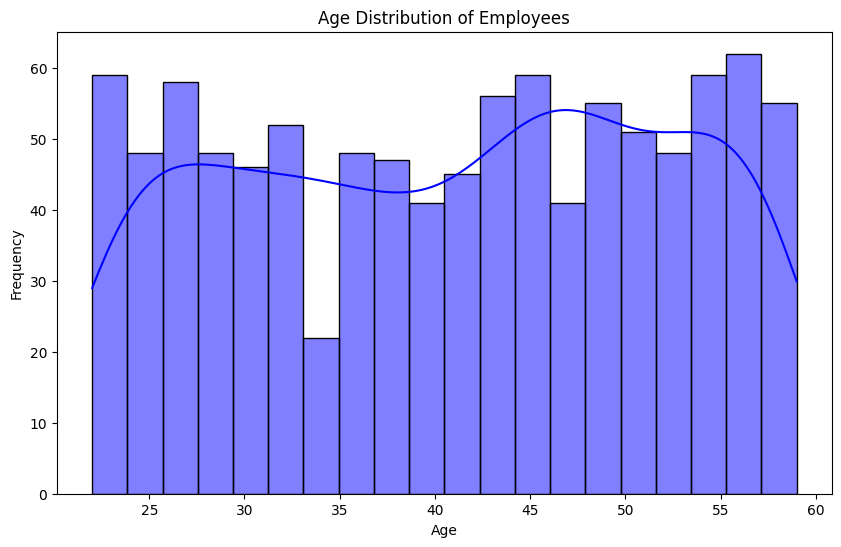

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### Salary Distribution by Department

C:\Users\dell\AppData\Local\Temp\ipykernel_19228\194627151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Salary', data=df, palette='coolwarm')


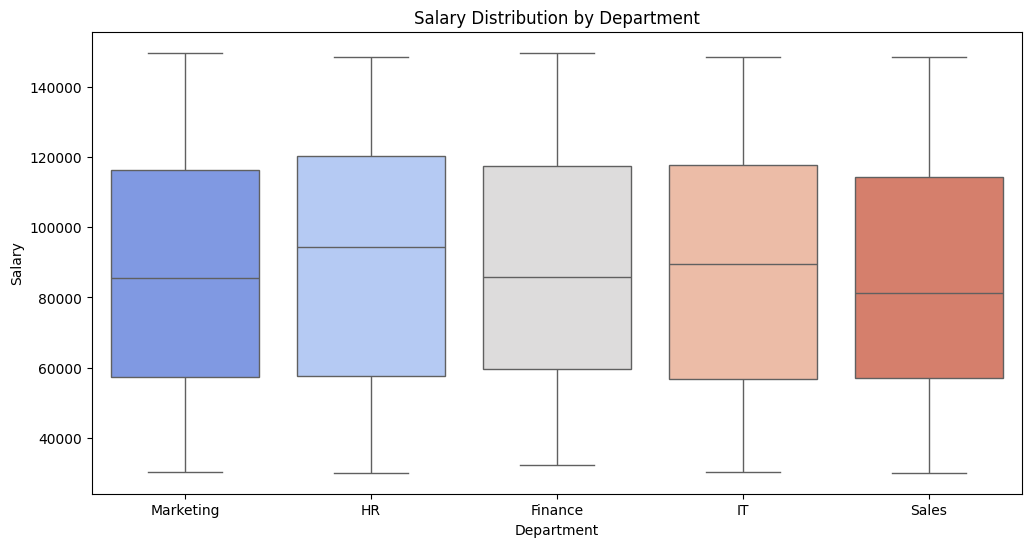

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Salary', data=df, palette='coolwarm')
plt.title("Salary Distribution by Department")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.show()

#### Gender Ratio in Departments

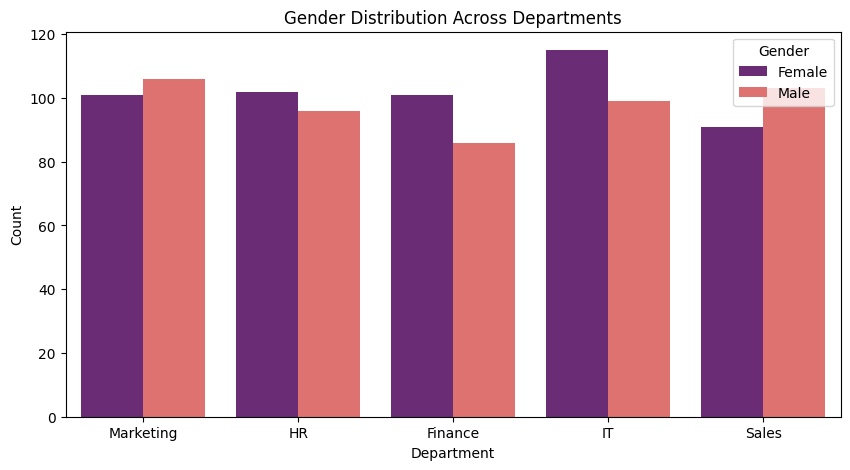

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Department', hue='Gender', data=df, palette='magma')
plt.title("Gender Distribution Across Departments")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()